In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [126]:
test_df = pd.read_csv('data\\data_lab1_змодельовані\\9.txt', delimiter='\t', header=None)

test_df[['col1', 'col2']] = test_df[0].str.split(expand=True)

test_df = test_df.drop(columns=[0])

test_df['col1'] = test_df['col1'].astype(float)
test_df['col2'] = test_df['col2'].astype(float)

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    200 non-null    float64
 1   col2    200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [127]:
X_test = test_df.copy()
test_df['y_kmeans'] = 1
X_test

,col1,col2
0,135.6176,39.3134
1,222.2470,26.5338
2,152.5396,46.5317
3,175.2222,33.0348
4,110.2923,23.7602
...,...,...
195,69.8322,19.9665
196,231.1744,29.4693
197,134.8455,49.1486
198,206.3709,34.5523


## Власний метод k-середніх 2.0

In [128]:
def initialize_centers(X, n_clusters):
    centers = []
    indices = np.arange(X.shape[0])

    for _ in range(n_clusters):
        random_index = np.random.choice(indices, 1, replace=False)
        centers.append(X[random_index[0]])
        indices = np.delete(indices, np.where(indices == random_index))
    return np.array(centers)


def assign_objects_to_clusters(X, centers):
    labels = []
    objects_num = X.shape[0]
    centers_num = len(centers)

    for i in range(objects_num):
        distances = []
        for j in range(centers_num):
            euclidean_distance = np.linalg.norm(X[i] - centers[j])
            distances.append(euclidean_distance)
        labels.append(np.argmin(distances))
    return labels


def update_centers(X, labels, n_clusters):
    new_centers = []
    for i in range(n_clusters):
        cluster_objects = []
        for j in range(X.shape[0]):
            if i == labels[j]:
                cluster_objects.append(X[j])
        new_center = np.array(cluster_objects).mean(axis=0)
        new_centers.append(new_center)
    return new_centers


def calculate_inertia(X, centers, labels):
    inertia = 0
    objects_num = X.shape[0]

    for i in range(objects_num):
        assigned_center = centers[labels[i]]
        distance = np.linalg.norm(X[i] - assigned_center) ** 2
        inertia += distance
    return inertia


def kmeans(X, n_clusters, n_init=10, max_iters=1):
    best_labels = None
    best_centers = None
    best_inertia = float('inf')
    eps = 1e-4

    for _ in range(n_init):
        # Ініціалізація початкових центрів за допомогою рандомних центрів
        centers = initialize_centers(X, n_clusters)
        labels = None

        for _ in range(max_iters):
            labels = assign_objects_to_clusters(X, centers)

            new_centers = update_centers(X, labels, n_clusters)

            # Перевірка на збіжність
            if np.all(np.abs(new_centers - centers) <= eps):
                break

            centers = new_centers

        # Розрахунок інерції (сума квадратів відстаней до центрів)
        inertia = calculate_inertia(X, centers, labels)
        print(inertia)
        
        # Порівняння з найкращим результатом
        if inertia < best_inertia:
            best_labels = labels
            best_centers = centers
            best_inertia = inertia
        
    return best_labels, np.array(best_centers)

101965.41773616071
53514.525815667104
195743.7326088075
141334.38259985976
103939.45932629814
113904.6436265645
125139.43676265275
51652.5280761471
51903.06803365241
94625.07722347874
[0, 1, 0, 0, 2, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0, 2, 2, 1, 1, 2, 1, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 2, 1, 0, 2, 2, 1, 2, 1, 0, 0, 2, 0, 2, 1, 0, 2, 1, 2, 0, 1, 2, 2, 0, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 0, 2, 0, 2, 1, 0, 2, 1, 1, 2, 2, 0, 1, 1, 0, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1, 2, 1, 1, 0, 0, 0, 1, 0, 2, 2, 1, 0, 1, 2]


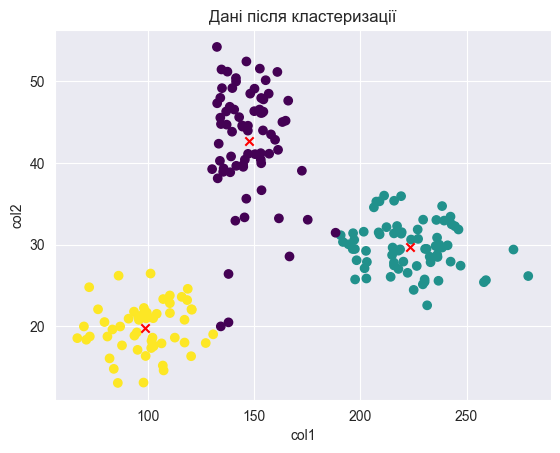

<Axes: >

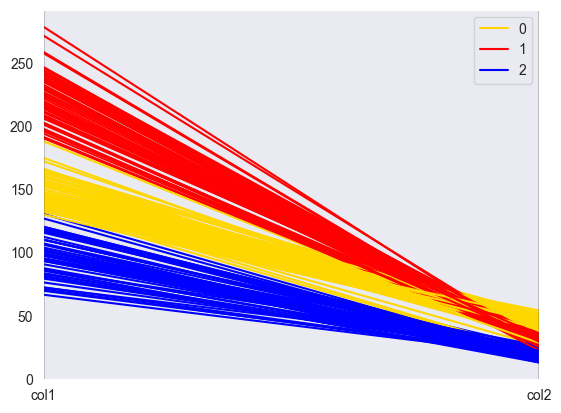

In [129]:
labels,centers  = kmeans(X_test.values, 3)
print(labels)
test_df['y_kmeans'] = labels

# Візуалізація даних після кластеризації
plt.scatter(test_df['col1'],test_df['col2'], c=test_df['y_kmeans'],cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='r', marker='x', label='Центроїди')
plt.xlabel('col1')
plt.ylabel('col2')
plt.title('Дані після кластеризації')
plt.show()

colors = ('gold', 'red', 'blue', 'green','hotpink')
pd.plotting.parallel_coordinates(test_df, 'y_kmeans', cols=X_test.columns, color=colors)